### Questions
* is this a topic where i will have to google most of the time? 
    * yes

### Objectives
YWBAT 
* build a box plot
* build histograms
* build and interpret violin plots
* add vlines and hlines to boost visualizations
* make subplots longform
* make subplots with a for loop

### Outline
* questions
* load in some data or create data
* plotting everything


### Keyterms
* \*args -> arguments
* \*\*kwargs -> keyword argument
    * named parameter/argument

In [50]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

from pprint import pprint

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams['font.size'] = 12

In [29]:
def myfunction(*args, **kwargs):
    for a in args:
        print(a)
    
    print("printing kwargs")
    print(type(kwargs))
    for k in kwargs:
        print(k)
        print(kwargs[k])
    pass

In [30]:
myfunction(['a', 1, 2], 3, {"b": 2}, kw="this is an argument", kw2="another one")

['a', 1, 2]
3
{'b': 2}
printing kwargs
<class 'dict'>
kw
this is an argument
kw2
another one


In [2]:
boston = load_boston()

In [3]:
data = boston.data
columns = list(boston.feature_names) + ['target']
target = boston.target

In [4]:
df = pd.DataFrame(np.column_stack((data, target)), columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


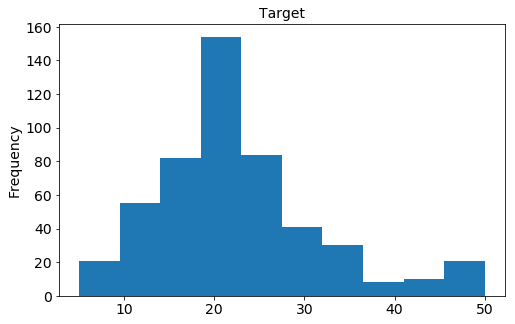

In [45]:
df['target'].plot(kind='hist', figsize=(8, 5), fontsize=14)
plt.title("Target", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

### Feature Engineering
* Create features from your data
* Make new data from existing data

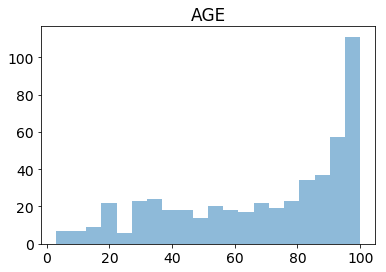

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [46]:
# let's make some categories for age
plt.hist(df.AGE, bins=20, alpha=0.5)
plt.title('AGE')
plt.show()

display(df.AGE.describe())

In [37]:
age_categories = []

for age in df["AGE"]:
    if age <= 45:
        age_categories.append("young")
    elif age <=94:
        age_categories.append("medium")
    else:
        age_categories.append("old")

df['age_categories'] = age_categories

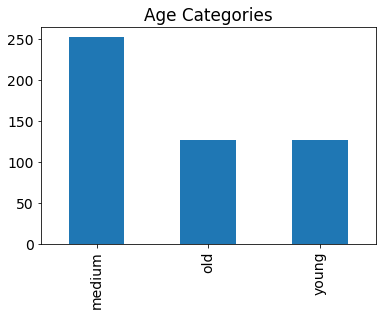

In [47]:
df.age_categories.value_counts().plot(kind='bar')
plt.title("Age Categories")
plt.show()

In [48]:
df['dis_to_nox'] = df['DIS'] / df['NOX']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,age_categories,dis_to_nox
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,medium,7.602230
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,medium,10.590832
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,medium,10.590832
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,medium,13.236245
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,medium,13.236245


In [24]:
# let's look at a description of the data
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

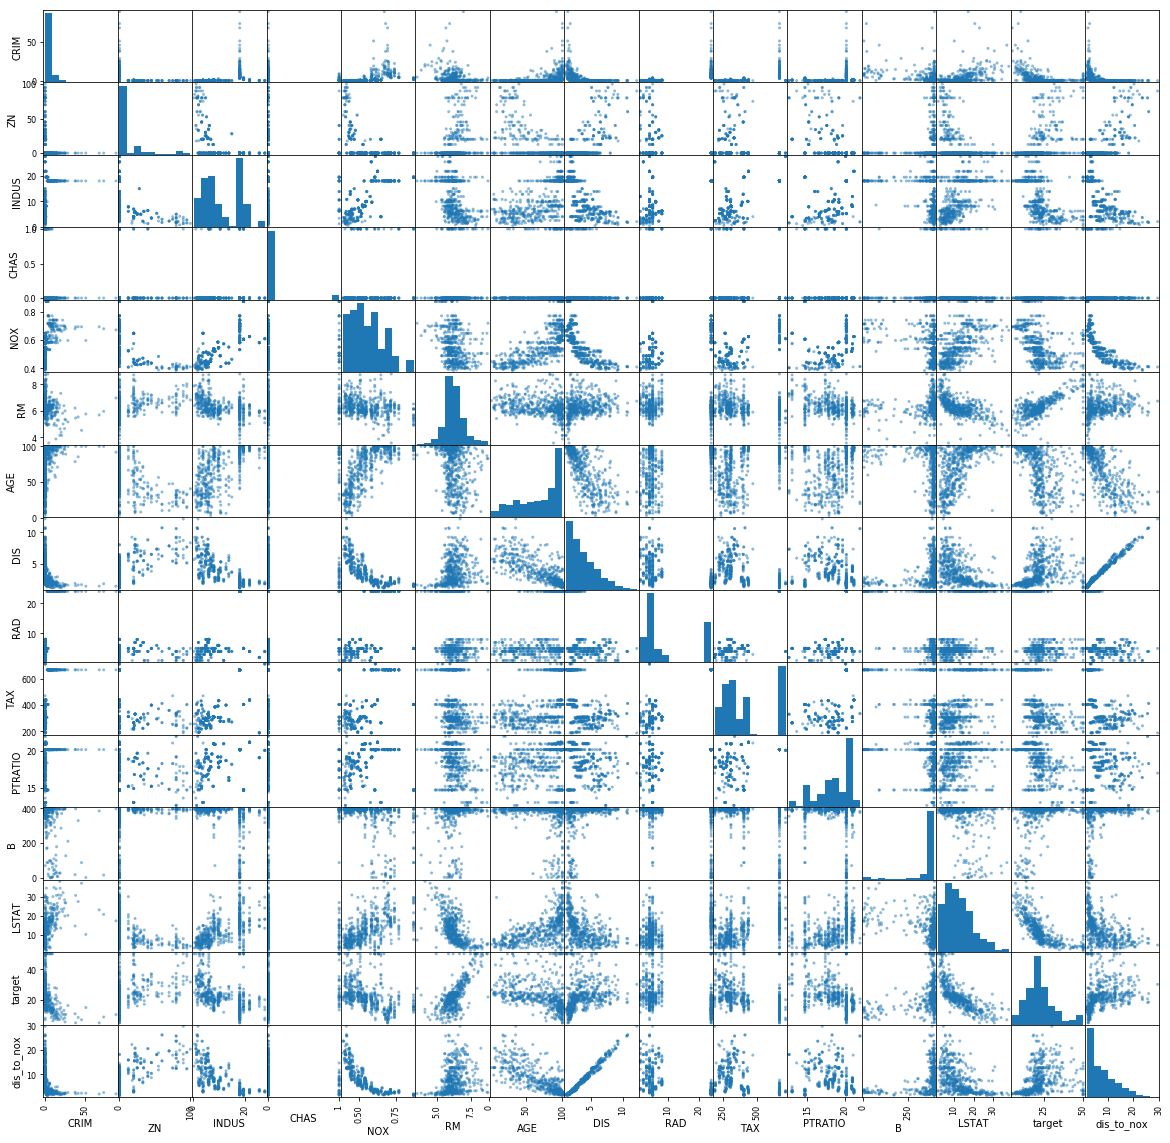

In [25]:
#  Scatter Matrix with Histogram
pd.plotting.scatter_matrix(df, figsize=(20, 20))
plt.show()

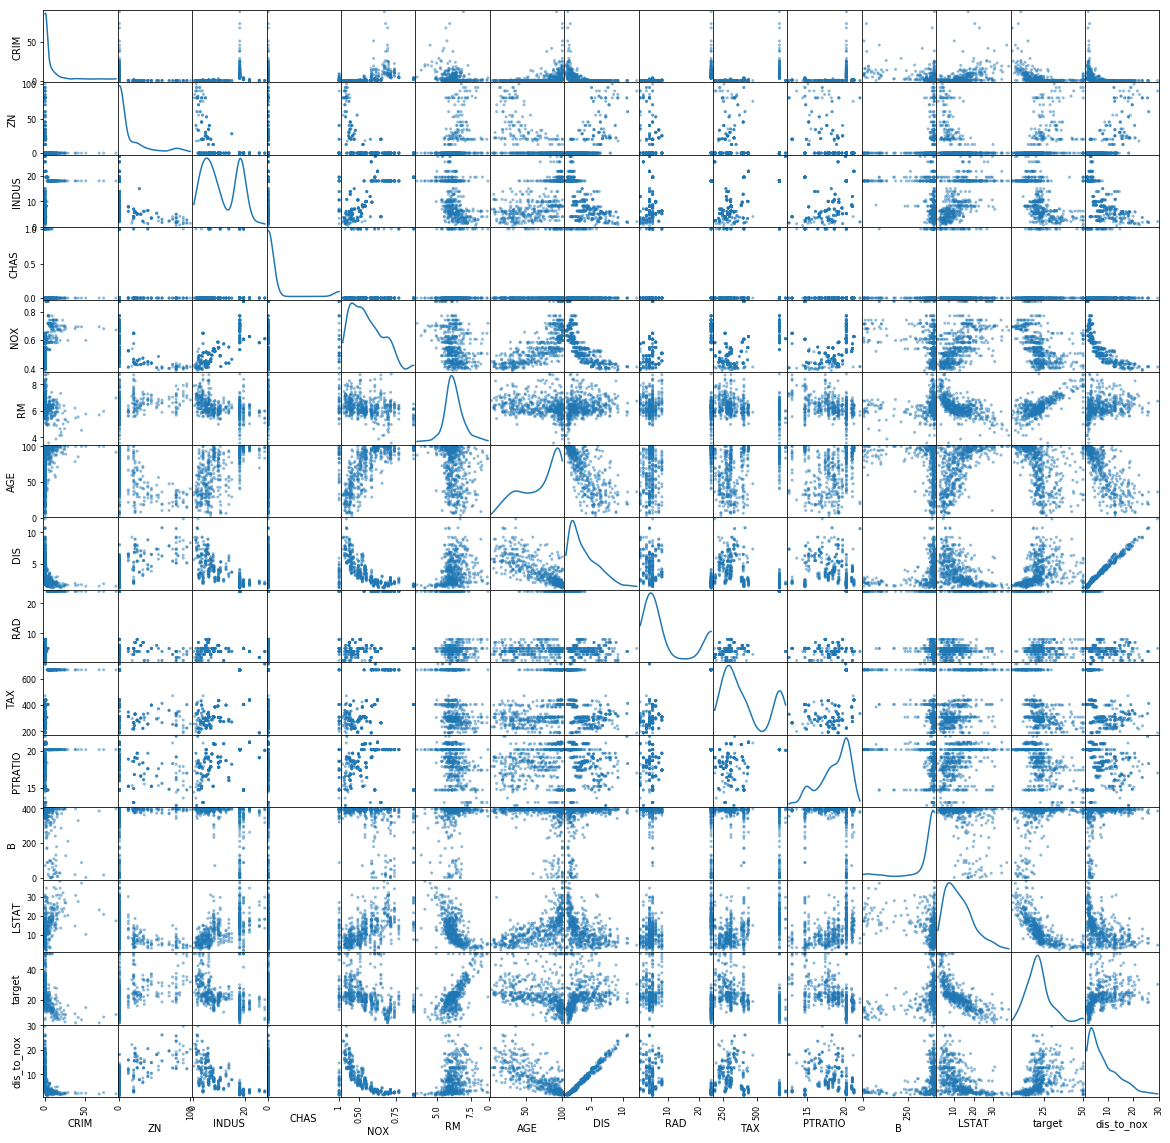

In [26]:
#  Scatter Matrix with KDE
# What is a KDE plot? 
# kernel density estimate - Probability density function

pd.plotting.scatter_matrix(df, figsize=(20, 20), diagonal='kde')
plt.show()

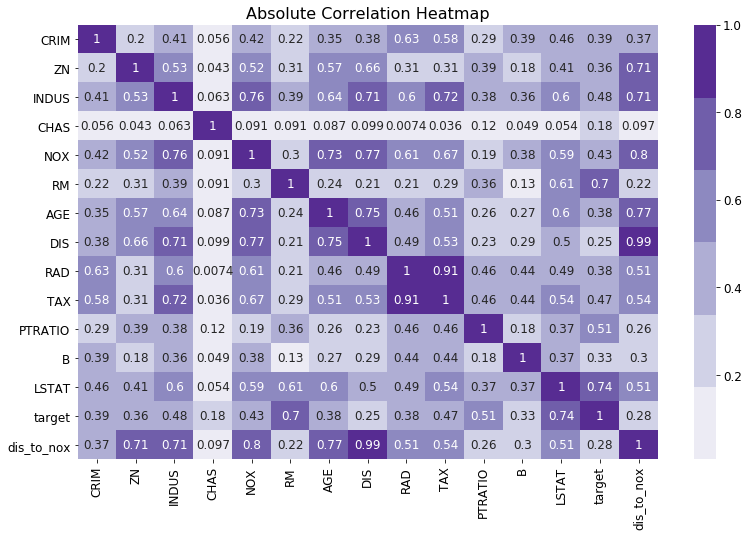

In [51]:
# correlation matrix plot
corr = df.corr()

plt.figure(figsize=(13, 8))
sns.heatmap(data=np.abs(corr), cmap=sns.color_palette('Purples'), annot=True)
plt.title("Absolute Correlation Heatmap", fontsize=16)
plt.show()

In [54]:
corr[corr > 0.50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,dis_to_nox
CRIM,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625505,0.582764,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.664408,NaN,NaN,NaN,NaN,NaN,NaN,0.709858
INDUS,NaN,NaN,1.000000,NaN,0.763651,NaN,0.644779,NaN,0.595129,0.720760,NaN,NaN,0.603800,NaN,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,0.763651,NaN,1.000000,NaN,0.731470,NaN,0.611441,0.668023,NaN,NaN,0.590879,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.69536,NaN
AGE,NaN,NaN,0.644779,NaN,0.731470,NaN,1.000000,NaN,NaN,0.506456,NaN,NaN,0.602339,NaN,NaN
DIS,NaN,0.664408,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.992012
RAD,0.625505,NaN,0.595129,NaN,0.611441,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN,NaN,NaN
TAX,0.582764,NaN,0.720760,NaN,0.668023,NaN,0.506456,NaN,0.910228,1.000000,NaN,NaN,0.543993,NaN,NaN


In [68]:
# correlation matrix with conditional of 0.50

def plot_corr_heat_map(df, threshold=0.50):
    # creating a correlation of absolute values
    corr = df.corr().abs()
    # values of correlation matrix that are above threshold
    corr_sliced = corr[corr>threshold]
    
    # creating a figure with figize of (13, 8)
    plt.figure(figsize=(13, 8))
    
    # creating a seaborn heatmap 
    # data is coming from corr_sliced with a purple color palette
    # annot=True adds the heatmap values to the heatmap
    sns.heatmap(data=corr_sliced, cmap=sns.color_palette('Purples'), annot=True)
    
    # Assigning a title to the plot and threshold is assigned to passed in variable
    plt.title(f"Absolute Correlation Heatmap\nThreshold={threshold}", fontsize=16)
    
    # printing our plot
    plt.show()

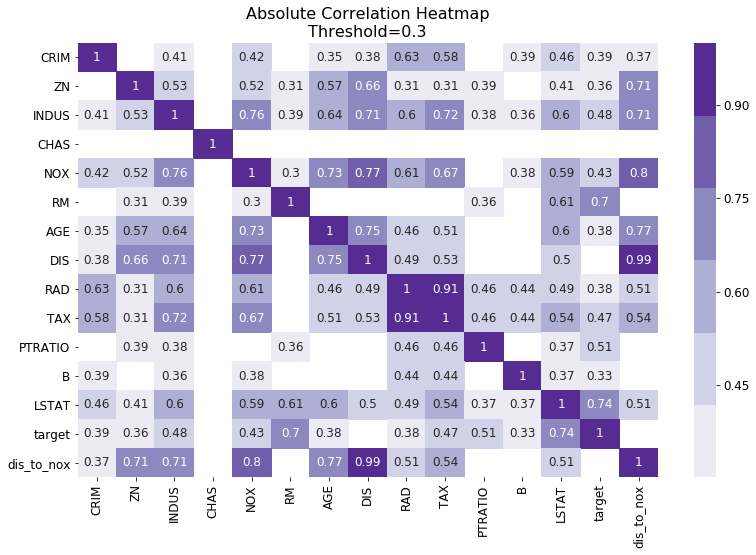

In [69]:
plot_corr_heat_map(df, threshold=0.3)

In [71]:
# plot 1 histogram

def plot_hist(df, column_name="RM"):
    tick_fonts = {"fontname": "Chalkduster", "fontsize": 12}
    title_fonts = {"fontname": "Chalkduster", "fontsize": 16}
    plt.figure(figsize=(8, 5))
    plt.grid(zorder=0)
    plt.hist(df[column_name], bins=20, alpha=0.7, zorder=2)
    plt.title(column_name, **title_fonts)
    plt.xticks(**tick_fonts)
    plt.yticks(**tick_fonts)
    plt.show()

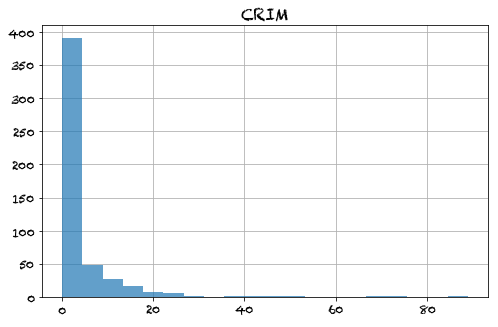

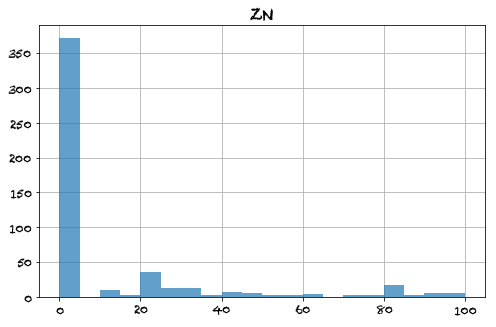

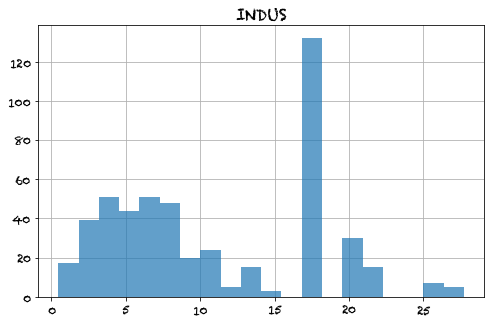

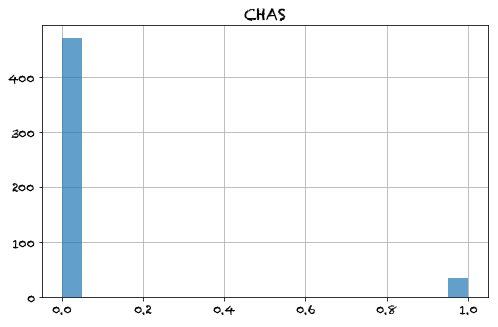

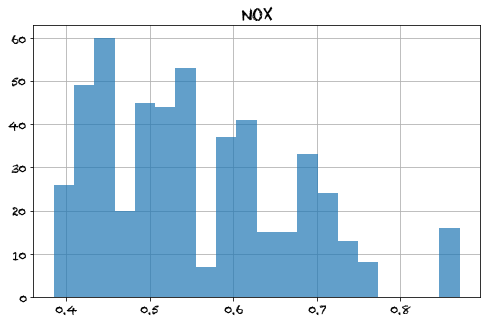

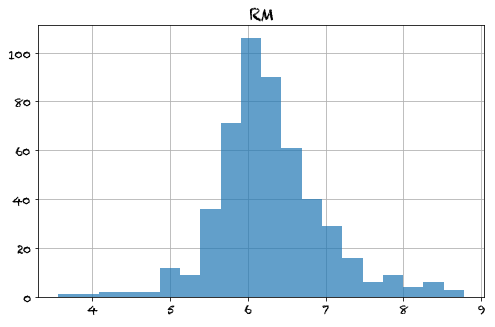

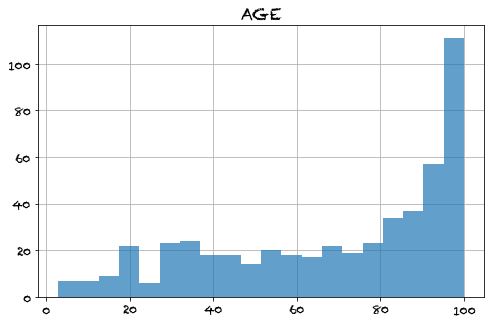

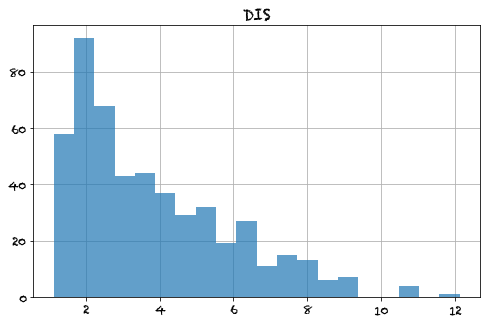

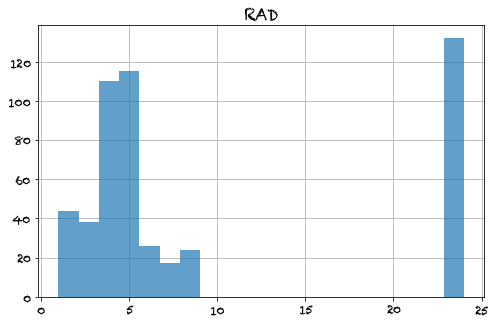

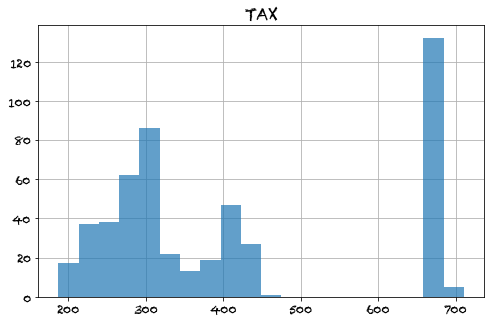

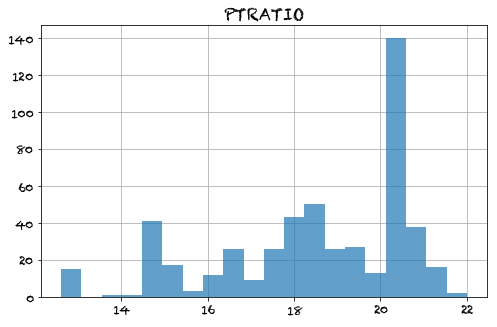

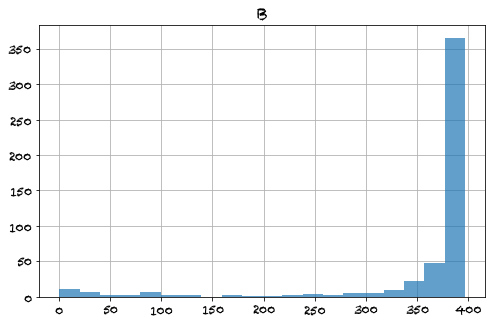

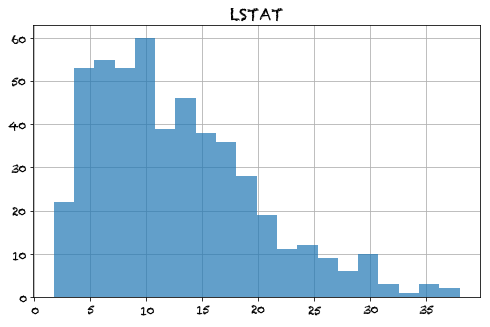

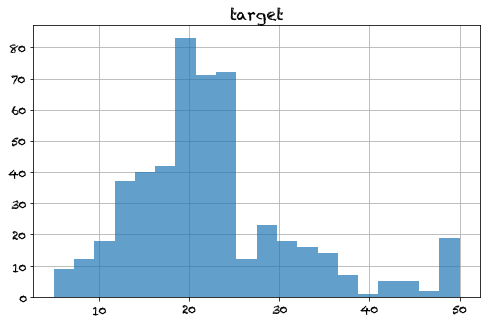

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1a1d8449d8> (for post_execute):


KeyboardInterrupt: 

In [72]:
# plot histograms for all columns
for column in df.columns:
    plot_hist(df, column_name=column)
    print("\n\n")

In [73]:
# plot a distplot 
# plots histogram with PDF (probability density function)

def plot_distplot(df, column_name="RM", add_grid=True):
    tick_fonts = {"fontname": "Chalkduster", "fontsize": 12}
    title_fonts = {"fontname": "Chalkduster", "fontsize": 16}
    
    plt.figure(figsize=(8, 5))
    if add_grid==True:
        plt.grid(zorder=0)
    
    sns.distplot(df[column_name])
    plt.title(column_name, **title_fonts)
    plt.xticks(**tick_fonts)
    plt.yticks(**tick_fonts)
    plt.show()

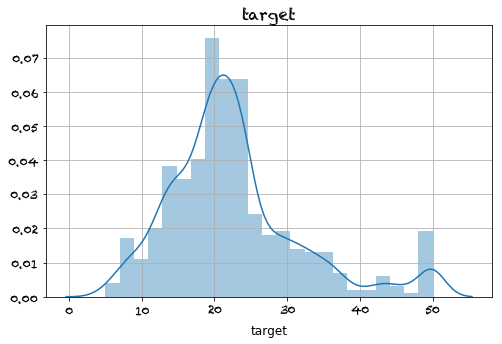

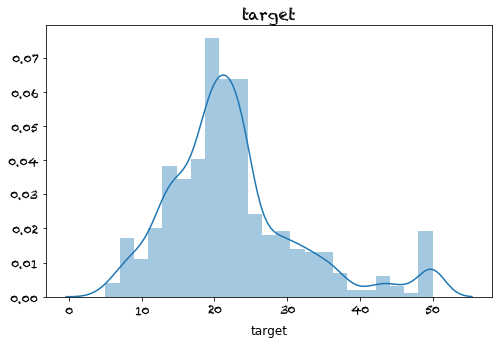

In [77]:
plot_distplot(df, "target")
plot_distplot(df, "target", add_grid=False)

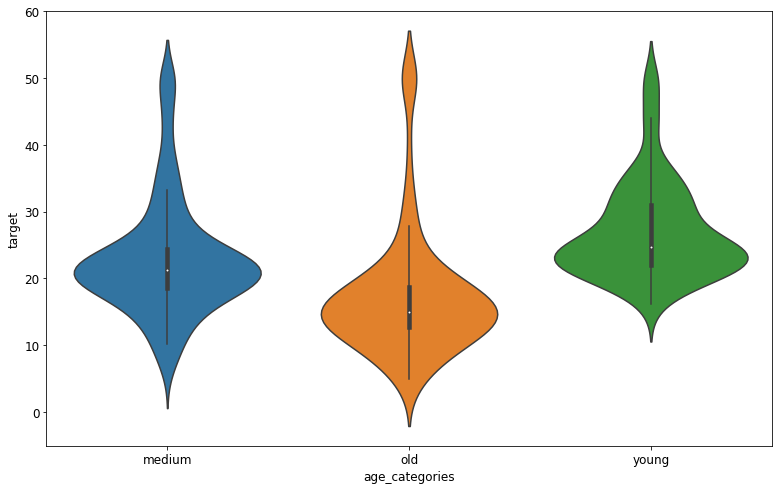

In [76]:
# plot a violin plot
# work best with categories

# plot a distribution of a value across multiple categories

# let's plot target vs the age_types

plt.figure(figsize=(13, 8))
sns.violinplot(x='age_categories', y='target', data=df)
plt.show()

### What do we notice about the plot above?
* they look like violins
* no outliers, or not many
* 'low' has high frequencies for target values between 20 and 30
* 'low' has more values closer to the median, because the range is shorter
* as we move from 'low' to 'medium' to 'high' the median target decreases across the groups. 

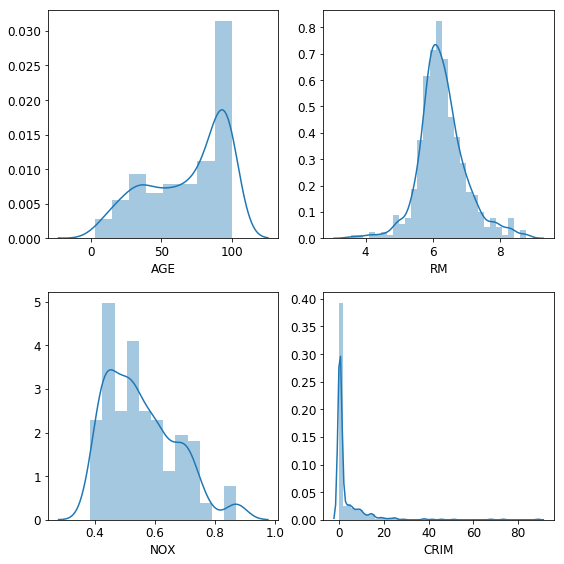

In [89]:
# plot 2 subplots side by side
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
plt.subplot(221)
sns.distplot(df['AGE'])
# sns.distplot(df["AGE"], ax=ax[0])

plt.subplot(222)
sns.distplot(df['RM'])

plt.subplot(223)
sns.distplot(df["NOX"])

plt.subplot(224)
sns.distplot(df["CRIM"])


plt.tight_layout()
plt.show()

In [90]:
df.columns.shape

(16,)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
CRIM              506 non-null float64
ZN                506 non-null float64
INDUS             506 non-null float64
CHAS              506 non-null float64
NOX               506 non-null float64
RM                506 non-null float64
AGE               506 non-null float64
DIS               506 non-null float64
RAD               506 non-null float64
TAX               506 non-null float64
PTRATIO           506 non-null float64
B                 506 non-null float64
LSTAT             506 non-null float64
target            506 non-null float64
age_categories    506 non-null object
dis_to_nox        506 non-null float64
dtypes: float64(15), object(1)
memory usage: 63.4+ KB


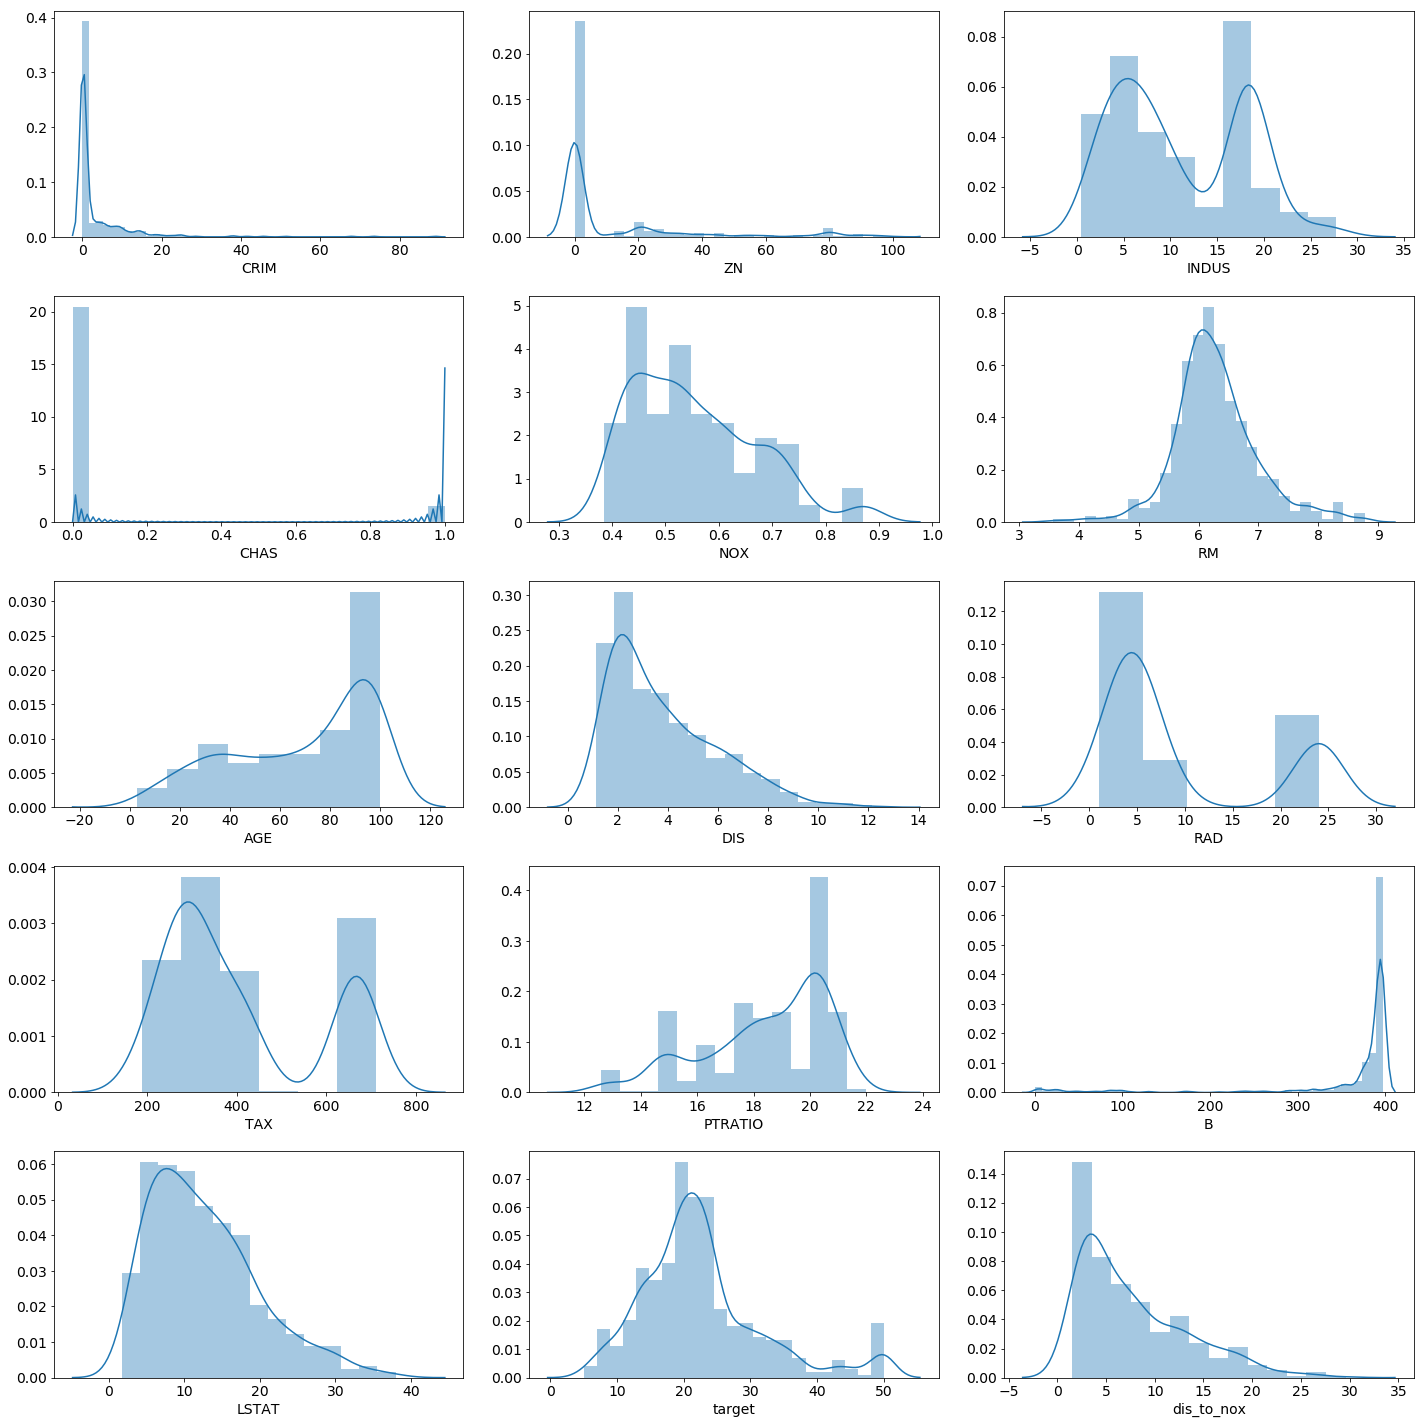

In [98]:
# iteratively plot subplots...spoiler alert, I will use google
# drop age_type since it's a string column

columns = df.drop('age_categories', axis=1).columns
matplotlib.rcParams["font.size"]=14

fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(20, 20))

for index, a in enumerate(ax.flatten()):
    column = columns[index]
    a = sns.distplot(df[column], ax=a)
plt.tight_layout()
plt.show()

### Assessment / What did we learn? 
* \*args, \*\*kwargs
* subplots in matplotlib
    * basically a big matrix of plots
*